In [1]:
import requests
import csv

# Define the API URL
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_url)

# Extract data from the response
data = response.json()

# Extract the required data attributes
episodes = data['_embedded']['episodes']
episode_data = []
for episode in episodes:
    episode_data.append({
        'id': episode['id'],
        'url': episode['url'],
        'name': episode['name'],
        'season': episode['season'],
        'number': episode['number'],
        'type': episode['type'],
        'airdate': episode['airdate'],
        'airtime': episode['airtime'],
        'runtime': episode['runtime'],
        'average_rating': episode['rating']['average'],
        'summary': episode['summary'].strip('<p>').strip('</p>'),
        'medium_image_link': episode['image']['medium'],
        'original_image_link': episode['image']['original']
    })

# Specify the CSV file path
csv_file_path = "episode_data.csv"

# Write the data to a CSV file
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
                  'runtime', 'average_rating', 'summary', 'medium_image_link', 'original_image_link']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(episode_data)

print("Data has been extracted and saved to", csv_file_path)


Data has been extracted and saved to episode_data.csv


In [3]:
import pandas as pd

# Specify the CSV file path
csv_file_path = "episode_data.csv"

# Load the CSV data into a pandas DataFrame
data_frame = pd.read_csv(csv_file_path)

# Display the loaded data
print(data_frame.head(10))


       id                                                url  \
0  869671  https://www.tvmaze.com/episodes/869671/westwor...   
1  911201  https://www.tvmaze.com/episodes/911201/westwor...   
2  911204  https://www.tvmaze.com/episodes/911204/westwor...   
3  911205  https://www.tvmaze.com/episodes/911205/westwor...   
4  927174  https://www.tvmaze.com/episodes/927174/westwor...   
5  932057  https://www.tvmaze.com/episodes/932057/westwor...   
6  938404  https://www.tvmaze.com/episodes/938404/westwor...   
7  943065  https://www.tvmaze.com/episodes/943065/westwor...   
8  943066  https://www.tvmaze.com/episodes/943066/westwor...   
9  943067  https://www.tvmaze.com/episodes/943067/westwor...   

                        name  season  number     type     airdate airtime  \
0               The Original       1       1  regular  2016-10-02   21:00   
1                   Chestnut       1       2  regular  2016-10-09   21:00   
2                  The Stray       1       3  regular  2016-10-1

# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

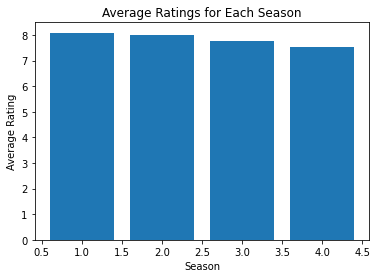

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by season and calculate the average rating for each season
season_ratings = data_frame.groupby('season')['average_rating'].mean()

# Create a bar plot to compare ratings for all seasons
plt.bar(season_ratings.index, season_ratings)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()


# Get all the episode names, whose average rating is more than 8 for every season

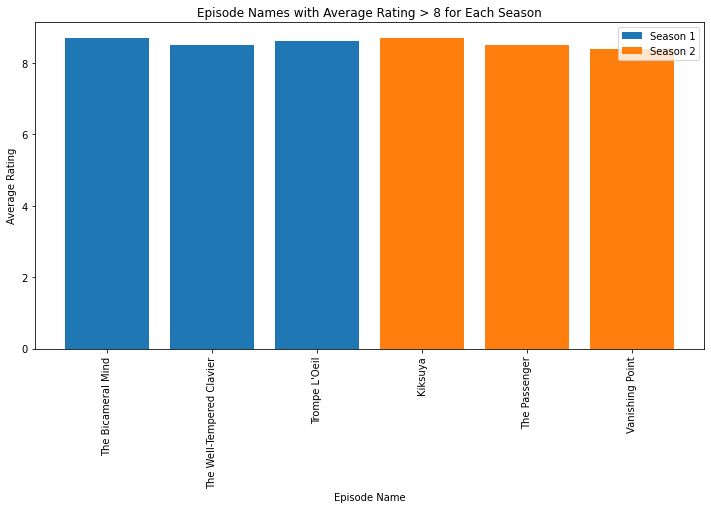

In [7]:

# Filter the data for episodes with average rating > 8
filtered_data = data_frame[data_frame['average_rating'] > 8]

# Group the filtered data by season and extract the episode names and ratings
season_episode_ratings = filtered_data.groupby(['season', 'name'])['average_rating'].mean().reset_index()

# Create a bar plot to show episode names vs ratings for each season
plt.figure(figsize=(12, 6))
for season in season_episode_ratings['season'].unique():
    season_data = season_episode_ratings[season_episode_ratings['season'] == season]
    plt.bar(season_data['name'], season_data['average_rating'], label='Season ' + str(season))

plt.xlabel('Episode Name')
plt.ylabel('Average Rating')
plt.title('Episode Names with Average Rating > 8 for Each Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()


# Get all the episode names that aired before May 2019

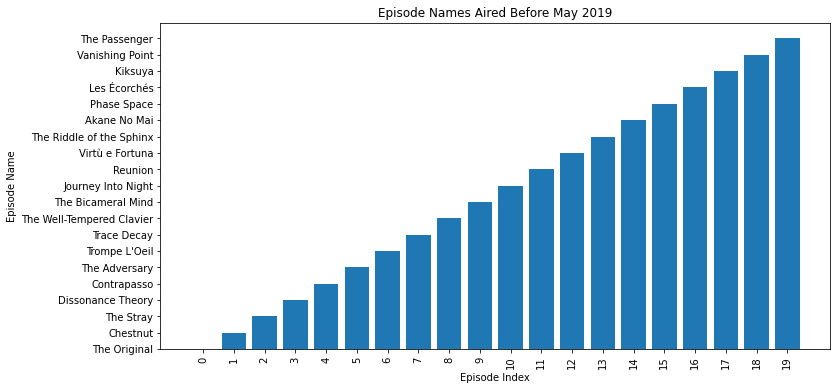

In [9]:
# Extract the year from the 'airdate' column
data_frame['year'] = pd.to_datetime(data_frame['airdate']).dt.year

# Filter the data for episodes that aired before May 2019
filtered_data = data_frame[data_frame['airdate'] < '2019-05']

# Extract the episode names
episode_names = filtered_data['name']

# Create a bar plot to show the episode names
plt.figure(figsize=(12, 6))
plt.bar(range(len(episode_names)), episode_names)

plt.xlabel('Episode Index')
plt.ylabel('Episode Name')
plt.title('Episode Names Aired Before May 2019')
plt.xticks(range(len(episode_names)), rotation=90)
plt.show()


# Get the episode name from each season with the highest and lowest rating

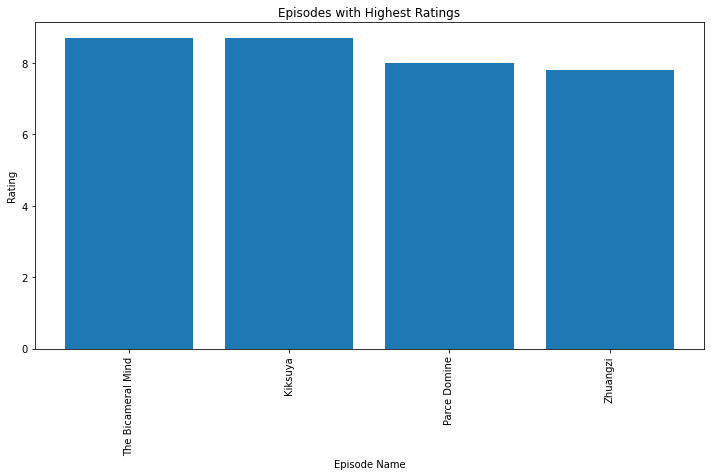

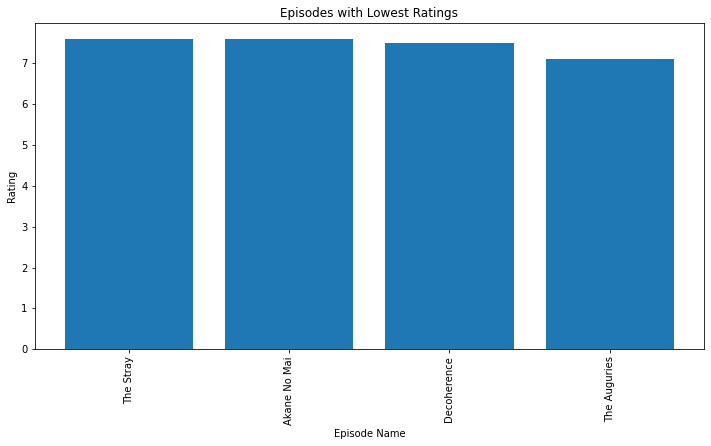

In [11]:
# Convert the 'average_rating' column to numeric
data_frame['average_rating'] = pd.to_numeric(data_frame['average_rating'])

# Group the data by season
grouped_data = data_frame.groupby('season')

# Get the episode with the highest rating from each season
highest_rating_episodes = grouped_data.apply(lambda x: x.loc[x['average_rating'].idxmax()])

# Get the episode with the lowest rating from each season
lowest_rating_episodes = grouped_data.apply(lambda x: x.loc[x['average_rating'].idxmin()])

# Extract the episode names and ratings
highest_rating_names = highest_rating_episodes['name']
highest_ratings = highest_rating_episodes['average_rating']
lowest_rating_names = lowest_rating_episodes['name']
lowest_ratings = lowest_rating_episodes['average_rating']

# Plot the chart for the highest ratings
plt.figure(figsize=(12, 6))
plt.bar(range(len(highest_rating_names)), highest_ratings)
plt.xlabel('Episode Name')
plt.ylabel('Rating')
plt.title('Episodes with Highest Ratings')
plt.xticks(range(len(highest_rating_names)), highest_rating_names, rotation=90)
plt.show()

# Plot the chart for the lowest ratings
plt.figure(figsize=(12, 6))
plt.bar(range(len(lowest_rating_names)), lowest_ratings)
plt.xlabel('Episode Name')
plt.ylabel('Rating')
plt.title('Episodes with Lowest Ratings')
plt.xticks(range(len(lowest_rating_names)), lowest_rating_names, rotation=90)
plt.show()


# Get the summary for the most popular ( ratings ) episode in every season

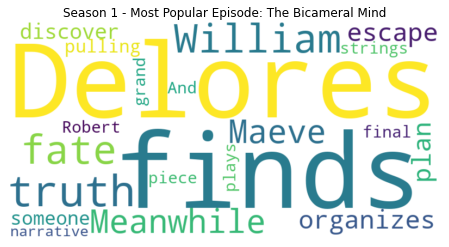

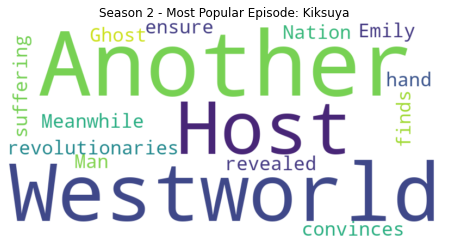

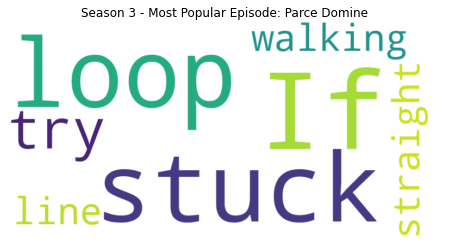

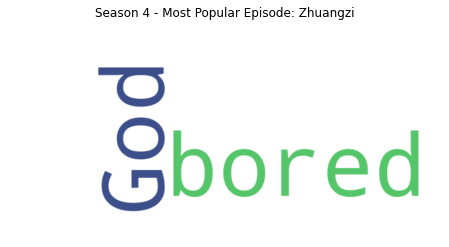

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the 'average_rating' column to numeric
data_frame['average_rating'] = pd.to_numeric(data_frame['average_rating'])

# Group the data by season
grouped_data = data_frame.groupby('season')

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white')

# Generate the wordcloud for each season's most popular episode
for season, group in grouped_data:
    # Get the most popular episode in the season
    most_popular_episode = group[group['average_rating'] == group['average_rating'].max()]
    episode_summary = most_popular_episode['summary'].values[0]
    episode_name = most_popular_episode['name'].values[0]
    
    # Generate the wordcloud
    cloud = wordcloud.generate(episode_summary)
    
    # Plot the wordcloud
    plt.figure(figsize=(8, 4))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(f'Season {season} - Most Popular Episode: {episode_name}')
    plt.axis('off')
    plt.show()
